![cw_title.JPG](attachment:cw_title.JPG)

<h1><center>Code Walk</center></h1>

***

<h2><center>Problem Overview</center></h2>

In [ ]:
# problem overview text and/or images

<h2><center>General Approach</center></h2>

![cw_approach.jpg](attachment:cw_approach.jpg)

In [ ]:
# text

In [ ]:
# diagram of data processing -> stepwise selection -> algorithms

In [ ]:
# diagram of Random Forest

In [ ]:
# diagram of XGB

<h2><center>EDA</center></h2>

### Libraries:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
cd drive

/content/drive


In [4]:
cd MyDrive

/content/drive/MyDrive


In [5]:
cd CreditCardFraud

/content/drive/MyDrive/CreditCardFraud


In [6]:
cd csv

/content/drive/MyDrive/CreditCardFraud/csv


### Import Data

In [8]:
# import the toy dataset
eda = pd.read_csv("merge_sampled.csv")

In [9]:
eda

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3/9/2017,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4/7/2017,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,5/28/2017,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6/13/2017,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,7/16/2017,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,1/2/2018,0.458911,0.124405,0.597829,0.023698,0.004703,0.162860,0.000963,0.627714,...,NaN,NaN,0.004281,0.003969,0.003936,NaN,0.006478,0.003046,0.004138,0
99996,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2/27/2018,0.363298,0.038383,0.675999,0.023201,0.006627,0.160133,0.000720,0.822903,...,NaN,NaN,0.004239,0.008563,0.003117,NaN,0.006679,0.007450,0.002982,0
99997,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,3/8/2018,0.356621,0.036849,0.645728,0.020585,0.004587,0.166246,0.003972,0.871214,...,NaN,NaN,0.009920,0.005579,0.008481,NaN,0.001516,0.005997,0.004767,0
99998,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,3/29/2017,0.714477,0.000546,0.008019,0.817670,0.006265,NaN,0.008652,0.008341,...,NaN,NaN,1.006665,0.003085,0.914985,0.351957,1.001686,0.579711,0.454960,0


### Target Stratification

There are no missing values out of range values. Of the 8294 customer_IDs, 6096 (73.4 %) have a label of 0 (good customer, no default) and 2198 (26.5 %) have a label of 1 (bad customer, default).

The competition info tells us that good customers have been subsampled by a factor of 20; this means that in the real world,  98 % of the customers are good and 2 % are bad.

In [10]:
eda.target.isna().sum()

0

In [11]:
eda[eda.target > 1]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target


In [12]:
eda[eda.target < 0]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target


In [13]:
# unique customer IDs
eda.customer_ID.nunique()

8294

In [14]:
bad = eda[eda.target == 1] 
bad

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
104,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,3/15/2017,0.400025,0.000278,0.954861,0.023890,0.003140,NaN,0.008421,1.175081,...,NaN,NaN,1.002518,0.001170,0.870115,0.141214,1.003923,0.008945,0.736632,1
105,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,4/14/2017,0.405788,0.000269,0.944042,0.025613,0.008950,NaN,0.003707,1.177973,...,NaN,NaN,1.005944,0.003116,0.864712,0.145885,1.004833,0.002125,0.733311,1
106,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,5/15/2017,0.403615,0.032850,0.940261,0.026016,0.009074,NaN,0.008000,1.175785,...,NaN,NaN,1.006883,0.004455,0.871729,0.144555,1.000521,0.000765,0.729252,1
107,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,6/14/2017,0.391495,0.034461,0.936253,0.029538,0.005778,NaN,0.002849,1.174704,...,NaN,NaN,1.000132,0.002175,0.869414,0.151890,1.001034,0.008195,0.727660,1
108,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,7/15/2017,0.392356,0.037955,0.915764,0.028671,0.008595,NaN,0.002428,1.177958,...,NaN,NaN,1.001192,0.004609,0.869089,0.152654,1.007116,0.001493,0.727649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99954,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,11/24/2017,0.508168,0.031211,0.728673,0.024651,0.000430,0.214742,0.009083,1.005197,...,NaN,NaN,1.007616,0.007317,0.943896,0.414324,1.003824,0.291847,0.099427,1
99955,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,12/25/2017,0.527567,0.036217,0.725777,0.024589,0.251386,0.208348,0.008015,1.003667,...,NaN,NaN,1.006324,0.000010,0.950824,0.413562,1.001365,0.298827,0.095157,1
99956,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,1/25/2018,0.526164,0.035330,0.714960,0.026882,0.251946,0.209647,0.005900,1.007715,...,NaN,NaN,1.001821,0.001326,0.951614,0.417832,1.004149,0.297445,0.100708,1
99957,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,2/22/2018,0.498874,0.038715,0.709952,0.021511,0.254056,0.211477,0.001525,0.998875,...,NaN,NaN,1.006805,0.007966,0.950035,0.421610,1.000564,0.349198,0.099730,1


In [15]:
good = eda[eda.target == 0]
good

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3/9/2017,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4/7/2017,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,5/28/2017,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6/13/2017,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,7/16/2017,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,1/2/2018,0.458911,0.124405,0.597829,0.023698,0.004703,0.162860,0.000963,0.627714,...,NaN,NaN,0.004281,0.003969,0.003936,NaN,0.006478,0.003046,0.004138,0
99996,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2/27/2018,0.363298,0.038383,0.675999,0.023201,0.006627,0.160133,0.000720,0.822903,...,NaN,NaN,0.004239,0.008563,0.003117,NaN,0.006679,0.007450,0.002982,0
99997,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,3/8/2018,0.356621,0.036849,0.645728,0.020585,0.004587,0.166246,0.003972,0.871214,...,NaN,NaN,0.009920,0.005579,0.008481,NaN,0.001516,0.005997,0.004767,0
99998,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,3/29/2017,0.714477,0.000546,0.008019,0.817670,0.006265,NaN,0.008652,0.008341,...,NaN,NaN,1.006665,0.003085,0.914985,0.351957,1.001686,0.579711,0.454960,0


In [16]:
good.customer_ID.nunique()

6096

In [17]:
bad.customer_ID.nunique()

2198

In [ ]:
# put comments for this code 

In [18]:
label_stats = pd.DataFrame({'absolute': eda.target.value_counts(),
              'relative': eda.target.value_counts() / len(eda)})
label_stats['absolute upsampled'] =  label_stats.absolute * np.array([20, 1])
label_stats['relative upsampled'] = label_stats['absolute upsampled'] / label_stats['absolute upsampled'].sum()
label_stats

,absolute,relative,absolute upsampled,relative upsampled
0,74613,0.74613,1492260,0.983272
1,25387,0.25387,25387,0.016728


### Null Values

In [19]:
put comments here 

SyntaxError: ignored

In [20]:
eda.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 191 columns):
 #    Column       Non-Null Count   Dtype  
---   ------       --------------   -----  
 0    customer_ID  100000 non-null  object 
 1    S_2          100000 non-null  object 
 2    P_2          99214 non-null   float64
 3    D_39         100000 non-null  float64
 4    B_1          100000 non-null  float64
 5    B_2          99963 non-null   float64
 6    R_1          100000 non-null  float64
 7    S_3          81374 non-null   float64
 8    D_41         99963 non-null   float64
 9    B_3          99963 non-null   float64
 10   D_42         14614 non-null   float64
 11   D_43         69805 non-null   float64
 12   D_44         94947 non-null   float64
 13   B_4          100000 non-null  float64
 14   D_45         99963 non-null   float64
 15   B_5          100000 non-null  float64
 16   R_2          100000 non-null  float64
 17   D_46         78158 non-null   float64
 18   D_4

In [21]:
null_hist = eda.isna().sum().div(len(eda)).mul(100).sort_values(ascending=False)

FileNotFoundError: ignored

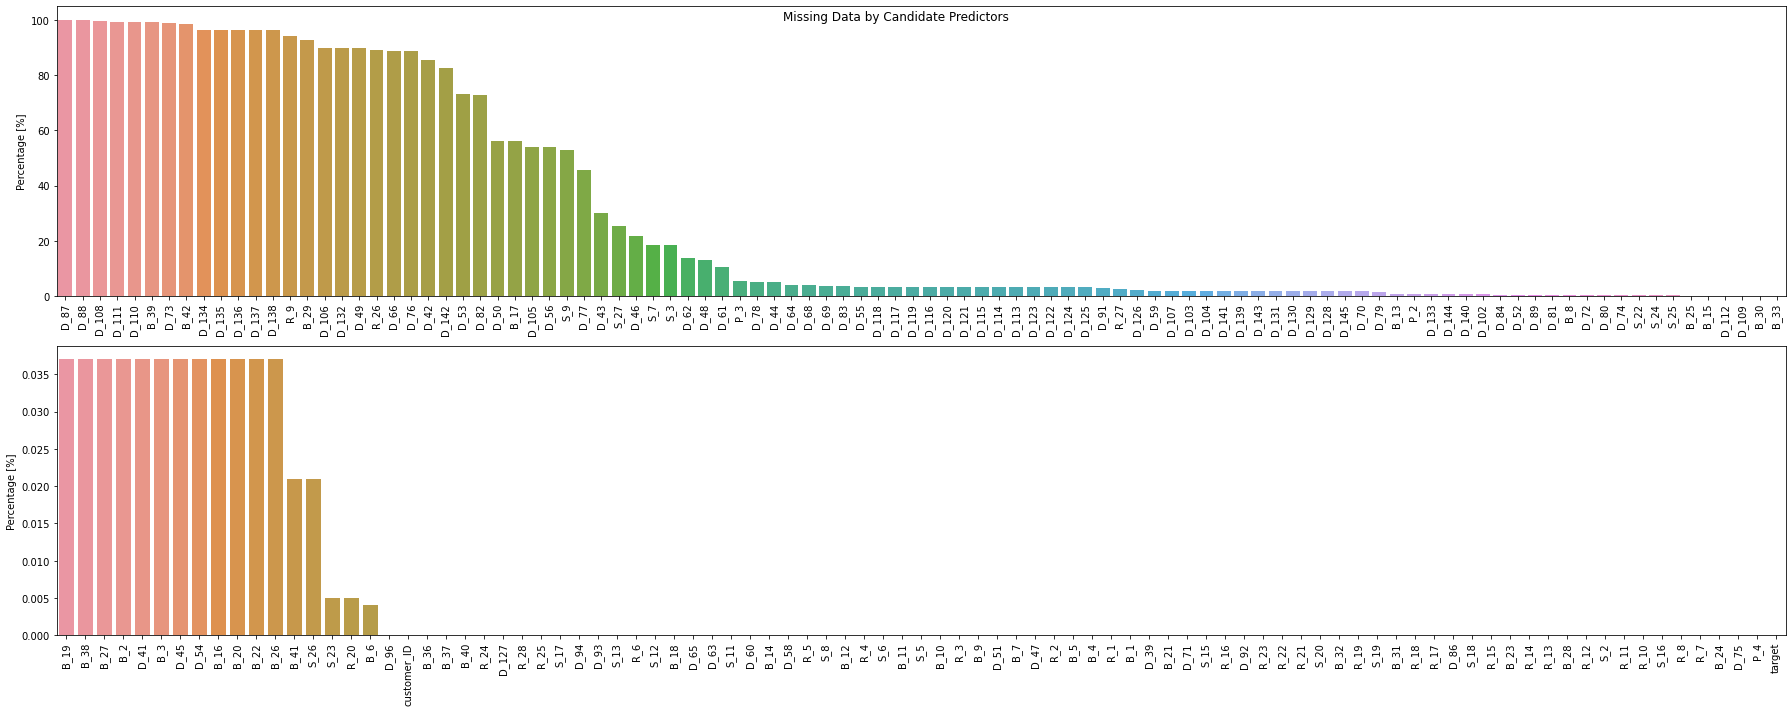

In [22]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=null_hist[:100].index, y=null_hist[:100].values, ax=ax[0])
sns.barplot(x=null_hist[100:].index, y=null_hist[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Missing Data by Candidate Predictors")
plt.tight_layout()
plt.savefig('figs/null_vars.png', dpi=425, bbox_inches='tight')
plt.show()

In [ ]:
NA = pd.DataFrame(data=[eda.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (eda.isna().sum()/eda.shape[0]*100).tolist()]], 
           columns=eda.columns, index=['NA Count', 'NA Percent']).transpose()

NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

### Categorical Variables

In [23]:
#change the color of the bck ground 

FileNotFoundError: ignored

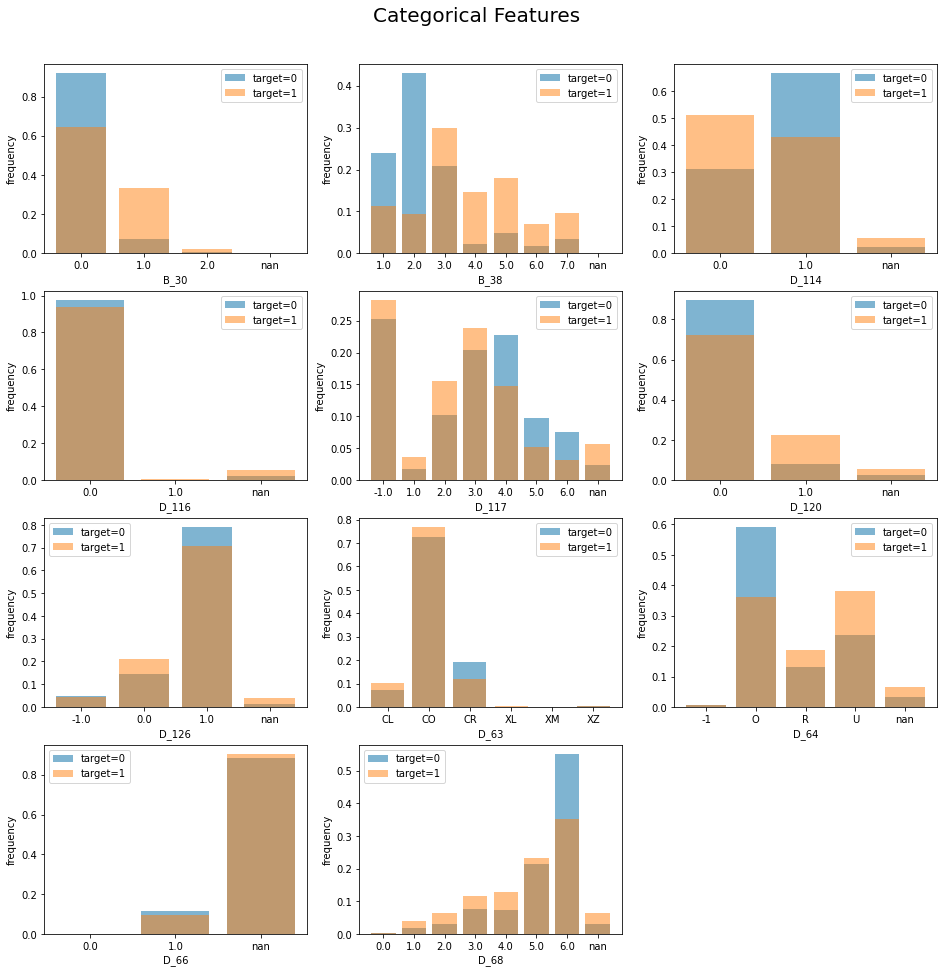

In [24]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
plt.figure(figsize=(16, 16))
for i, f in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    temp = pd.DataFrame(eda[f][eda.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(eda[f][eda.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Categorical Features', fontsize=20, y=0.93)
plt.savefig('figs/cat_vars.png', dpi=425, bbox_inches='tight')
plt.show()
del temp

### Continuous Variables

In [ ]:
cont_features = sorted([f for f in eda.columns if f not in cat_features + ['customer_ID', 'target', 'S_2']])
print(len(cont_features))
# print(cont_features)
ncols = 4
for i, f in enumerate(cont_features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Continuous Features', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(eda[f], bins=200)
    plt.xlabel(f)
plt.savefig('figs/cont_vars.png', dpi=425, bbox_inches='tight')
plt.show()

### Duration of Customer Data

In [25]:
customer = eda.groupby(['customer_ID','target']).size().reset_index().rename(columns={0:'months'})
customer.head()

,customer_ID,target,months
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,13


FileNotFoundError: ignored

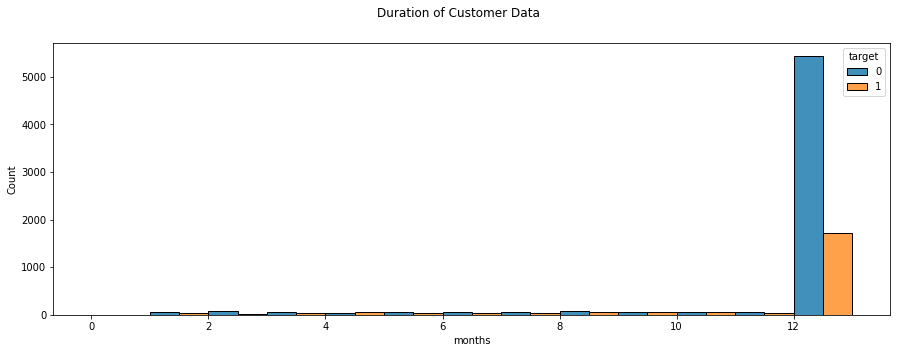

In [26]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='months', data=customer, hue='target', stat='count', multiple="dodge", bins=np.arange(0,14), ax=ax)
# ax.bar_label(ax.containers[0], fmt='%.f%%')
# ax.bar_label(ax.containers[1], fmt='%.f%%')
plt.suptitle("Duration of Customer Data")
plt.savefig('figs/customer.png', dpi=425, bbox_inches='tight')
plt.show()

In [ ]:
pickle.dump(eda, open("pickle/eda.pkl", "wb"))
pickle.dump(null_hist, open("pickle/nulls.pkl", "wb"))
pickle.dump(cat_features, open("pickle/cat_features.pkl", "wb"))

In [ ]:
# HANI EDA CODE

<h2><center>FEATURE SELECTION</center></h2>

During EDA, we saw that most of the candidate predictor variables contained < 10% null values. We decided to remove the variables with > 10% null values; the bulk of the variables we are removing are > 90% null values.

In [27]:
test = pd.DataFrame(eda.isna().sum())

In [28]:
test.reset_index()

,index,0
0,customer_ID,0
1,S_2,0
2,P_2,786
3,D_39,0
4,B_1,0
...,...,...
186,D_142,82728
187,D_143,1813
188,D_144,733
189,D_145,1813


In [29]:
df = test.rename(columns={0: "index", 1: "null_ct"}).reset_index()

In [ ]:
df

,level_0,index
0,customer_ID,0
1,S_2,0
2,P_2,786
3,D_39,0
4,B_1,0
...,...,...
186,D_142,82728
187,D_143,1813
188,D_144,733
189,D_145,1813


In [30]:
# make dynamic, change divisor when bigger DS
df['null_pct'] = df['index']/100000 * 100

In [31]:
df

,level_0,index,null_pct
0,customer_ID,0,0.000
1,S_2,0,0.000
2,P_2,786,0.786
3,D_39,0,0.000
4,B_1,0,0.000
...,...,...,...
186,D_142,82728,82.728
187,D_143,1813,1.813
188,D_144,733,0.733
189,D_145,1813,1.813


In [32]:
fs_vars = df[df['null_pct'] > 10]

In [33]:
fs_vars

,level_0,index,null_pct
7,S_3,18626,18.626
10,D_42,85386,85.386
11,D_43,30195,30.195
17,D_46,21842,21.842
19,D_48,12915,12.915
20,D_49,89762,89.762
24,D_50,56328,56.328
31,D_53,73244,73.244
37,S_7,18626,18.626
41,D_56,54123,54.123


In [34]:
fsv = list(fs_vars['level_0'])
fsv

['S_3',
 'D_42',
 'D_43',
 'D_46',
 'D_48',
 'D_49',
 'D_50',
 'D_53',
 'S_7',
 'D_56',
 'S_9',
 'D_61',
 'D_62',
 'B_17',
 'D_66',
 'D_73',
 'D_76',
 'D_77',
 'R_9',
 'D_82',
 'B_29',
 'D_87',
 'D_88',
 'D_105',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'S_27',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

In [35]:
# list of variables we do want
new_v = sorted([f for f in eda.columns if f not in fsv])
new_v

['B_1',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_2',
 'B_20',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_3',
 'B_30',
 'B_31',
 'B_32',
 'B_33',
 'B_36',
 'B_37',
 'B_38',
 'B_4',
 'B_40',
 'B_41',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'D_102',
 'D_103',
 'D_104',
 'D_107',
 'D_109',
 'D_112',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_133',
 'D_139',
 'D_140',
 'D_141',
 'D_143',
 'D_144',
 'D_145',
 'D_39',
 'D_41',
 'D_44',
 'D_45',
 'D_47',
 'D_51',
 'D_52',
 'D_54',
 'D_55',
 'D_58',
 'D_59',
 'D_60',
 'D_63',
 'D_64',
 'D_65',
 'D_68',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_74',
 'D_75',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_83',
 'D_84',
 'D_86',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'P_2',
 'P_3',
 'P_4',
 'R_1',
 'R_10',
 'R_11',


In [36]:
fs = eda[new_v].copy()

In [ ]:
fs

,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,S_22,S_23,S_24,S_25,S_26,S_5,S_6,S_8,customer_ID,target
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0.894090,0.135561,0.911191,0.974539,0.001243,0.023381,0.008322,0.922998,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0.902135,0.136333,0.919876,0.975624,0.004561,0.030599,0.002482,0.919414,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0.939654,0.134938,0.958699,0.974067,0.011736,0.048367,0.000530,1.001977,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0.913205,0.140058,0.926341,0.975499,0.007571,0.030063,0.000783,0.704016,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0.921026,0.131620,0.933479,0.978027,0.018200,0.054221,0.006698,0.917133,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0.927312,0.136109,0.934297,0.973335,0.008895,0.003671,1.003519,0.664955,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0.927598,0.139274,0.934902,0.975162,0.003994,0.004589,0.009121,0.004212,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0.923396,0.137267,0.932529,0.972051,0.005734,0.005730,0.009046,0.007804,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0.296741,0.135450,0.080604,0.969829,0.001976,0.001485,1.009798,0.009353,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,0


In [37]:
null_test = fs.isna().sum().div(len(eda)).mul(100).sort_values(ascending=False)

FileNotFoundError: ignored

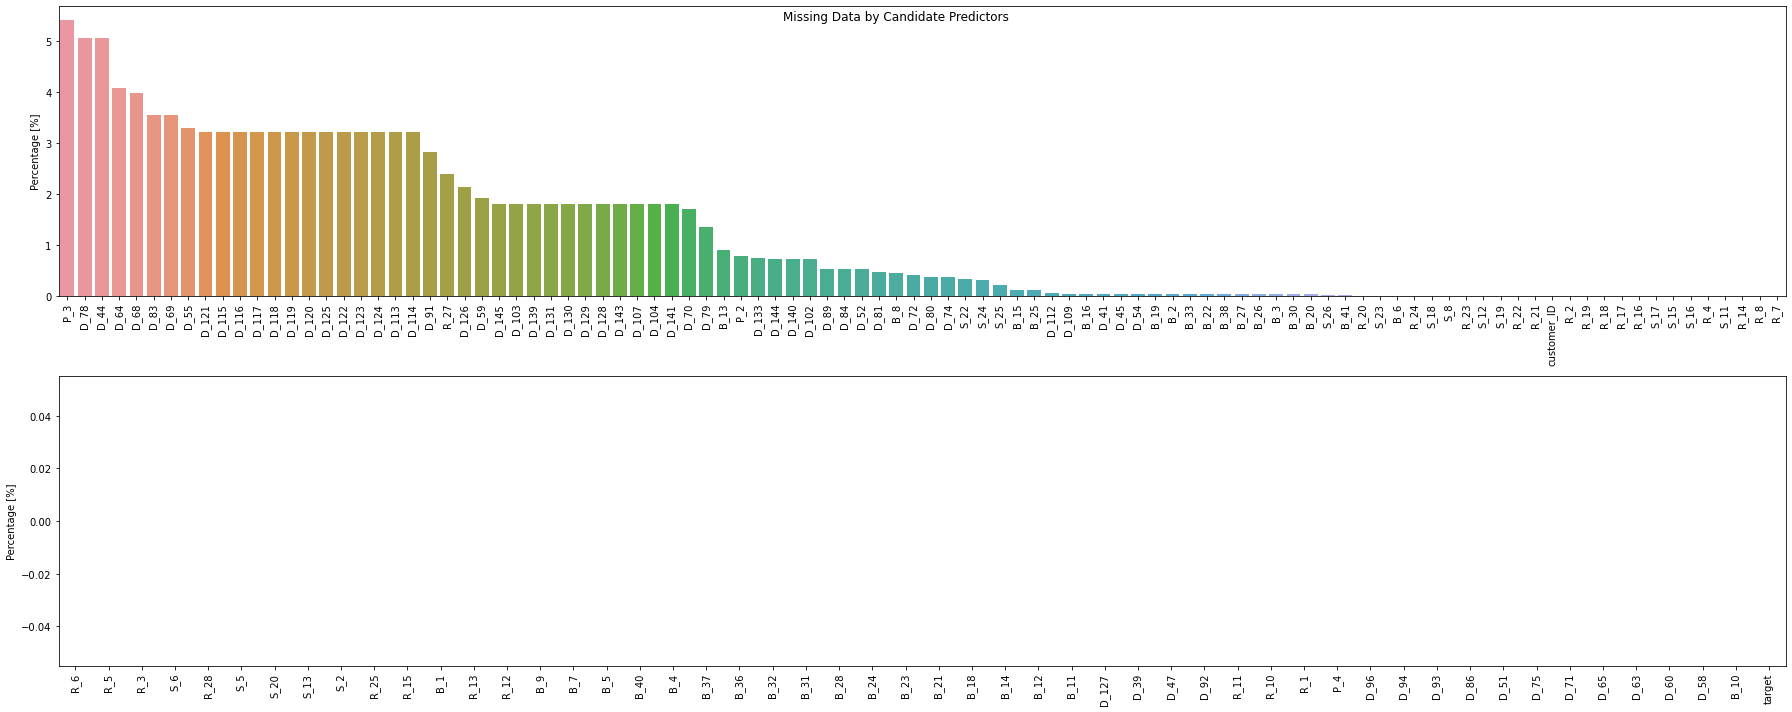

In [38]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=null_test[:100].index, y=null_test[:100].values, ax=ax[0])
sns.barplot(x=null_test[100:].index, y=null_test[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Missing Data by Candidate Predictors")
plt.tight_layout()
plt.savefig('figs/null_test1.png', dpi=425, bbox_inches='tight')
plt.show()

In [39]:
pickle.dump(fs, open("../pickle/fs_df.pkl", "wb"))

In [117]:
fs = pickle.load(open("../pickle/fs_df.pkl", "rb"))

### Categorical Features

In order to use Scikitlearn PCA, we will drop the categorical variables as well as `S_2`, which is a date/time variable. these will be evaluated separately.

In [118]:
fs

,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,S_22,S_23,S_24,S_25,S_26,S_5,S_6,S_8,customer_ID,target
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0.894090,0.135561,0.911191,0.974539,0.001243,0.023381,0.008322,0.922998,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0.902135,0.136333,0.919876,0.975624,0.004561,0.030599,0.002482,0.919414,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0.939654,0.134938,0.958699,0.974067,0.011736,0.048367,0.000530,1.001977,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0.913205,0.140058,0.926341,0.975499,0.007571,0.030063,0.000783,0.704016,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0.921026,0.131620,0.933479,0.978027,0.018200,0.054221,0.006698,0.917133,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0.927312,0.136109,0.934297,0.973335,0.008895,0.003671,1.003519,0.664955,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0.927598,0.139274,0.934902,0.975162,0.003994,0.004589,0.009121,0.004212,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0.923396,0.137267,0.932529,0.972051,0.005734,0.005730,0.009046,0.007804,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0.296741,0.135450,0.080604,0.969829,0.001976,0.001485,1.009798,0.009353,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,0


In [62]:
fs.columns

Index(['B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_18',
       'B_19',
       ...
       'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_5', 'S_6', 'S_8',
       'customer_ID', 'target'],
      dtype='object', length=152)

In [63]:
cat_features.append('customer_ID')

In [95]:
cat_features.pop()

'target'

In [97]:
cat_features.append('S_2')

In [114]:
data = fs[fs.columns.intersection(cat_features)]

In [103]:
data

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_68,S_2,customer_ID,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
0,0.0,2.0,1.0,0.0,4.0,0.0,1.0,6.0,3/9/2017,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0,1,0,0,0,0,1,0,0
1,0.0,2.0,1.0,0.0,4.0,0.0,1.0,6.0,4/7/2017,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0,1,0,0,0,0,1,0,0
2,0.0,2.0,1.0,0.0,4.0,0.0,1.0,6.0,5/28/2017,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0,1,0,0,0,0,1,0,0
3,0.0,2.0,1.0,0.0,4.0,0.0,1.0,6.0,6/13/2017,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0,1,0,0,0,0,1,0,0
4,0.0,2.0,1.0,0.0,4.0,0.0,1.0,6.0,7/16/2017,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,7.0,0.0,0.0,4.0,0.0,1.0,3.0,1/2/2018,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0,1,0,0,0,0,0,0,0,1
99996,1.0,6.0,0.0,0.0,4.0,0.0,1.0,3.0,2/27/2018,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0,1,0,0,0,0,0,0,0,1
99997,1.0,6.0,0.0,0.0,4.0,0.0,1.0,3.0,3/8/2018,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0,1,0,0,0,0,0,0,0,1
99998,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,5.0,3/29/2017,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,0,1,0,0,0,0,0,0,0,1


In [115]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data[['D_63','D_64']])
# Drop column B as it is now encoded
data = data.drop(['D_63','D_64'],axis = 1)
# Join the encoded df
data = data.join(one_hot)# this is one encoding 

In [119]:
fs_encode=pd.merge(fs,data, on=['customer_ID','S_2'])


,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0,0,1,0,0,0,0,1,0,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0,0,1,0,0,0,0,1,0,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0,0,1,0,0,0,0,1,0,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0,0,1,0,0,0,0,1,0,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0,1,0,0,0,0,0,0,0,1
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0,1,0,0,0,0,0,0,0,1
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0,1,0,0,0,0,0,0,0,1
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0,1,0,0,0,0,0,0,0,1


In [120]:
fs_new = sorted([f for f in fs_encode.columns if f not in cat_features + ['customer_ID','S_2']])#code been updated by hani 
fs_new

['B_1',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_2',
 'B_20',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_3',
 'B_31',
 'B_32',
 'B_33',
 'B_36',
 'B_37',
 'B_4',
 'B_40',
 'B_41',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'D_102',
 'D_103',
 'D_104',
 'D_107',
 'D_109',
 'D_112',
 'D_113',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_133',
 'D_139',
 'D_140',
 'D_141',
 'D_143',
 'D_144',
 'D_145',
 'D_39',
 'D_41',
 'D_44',
 'D_45',
 'D_47',
 'D_51',
 'D_52',
 'D_54',
 'D_55',
 'D_58',
 'D_59',
 'D_60',
 'D_63_CL',
 'D_63_CO',
 'D_63_CR',
 'D_63_XL',
 'D_63_XM',
 'D_63_XZ',
 'D_64_-1',
 'D_64_O',
 'D_64_R',
 'D_64_U',
 'D_65',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_74',
 'D_75',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_83',
 'D_84',
 'D_86',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'P_2',
 'P_3',
 'P_4',
 'R_

In [109]:
fs2_encode = fs_encode[fs_new].copy()#code updated by hani 

In [92]:

# this is what we will use for stepwise selection after imputing NaNs

Index(['B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_18',
       'B_19',
       ...
       'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_5', 'S_6',
       'S_8'],
      dtype='object', length=139)

In [ ]:
fs2_ecode.to_csv('data/fs2.csv')

In [ ]:
pickle.dump(fs2_ecode, open('data/fs2.pkl', 'wb'))
# fs2 = pickle.load(open('data/fs2.pkl', 'rb'))

In [121]:
ss = fs2_encode.fillna(fs2_encode.mean())

In [123]:
fs2_encode

,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,S_20,S_22,S_23,S_24,S_25,S_26,S_5,S_6,S_8,target
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0.009705,0.894090,0.135561,0.911191,0.974539,0.001243,0.023381,0.008322,0.922998,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0.009924,0.902135,0.136333,0.919876,0.975624,0.004561,0.030599,0.002482,0.919414,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0.008446,0.939654,0.134938,0.958699,0.974067,0.011736,0.048367,0.000530,1.001977,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0.006614,0.913205,0.140058,0.926341,0.975499,0.007571,0.030063,0.000783,0.704016,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0.005511,0.921026,0.131620,0.933479,0.978027,0.018200,0.054221,0.006698,0.917133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0.002984,0.927312,0.136109,0.934297,0.973335,0.008895,0.003671,1.003519,0.664955,0
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0.002146,0.927598,0.139274,0.934902,0.975162,0.003994,0.004589,0.009121,0.004212,0
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0.002412,0.923396,0.137267,0.932529,0.972051,0.005734,0.005730,0.009046,0.007804,0
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0.006557,0.296741,0.135450,0.080604,0.969829,0.001976,0.001485,1.009798,0.009353,0


In [ ]:
pickle.dump(ss, open('data/ss_imputed.pkl', 'wb'))
# ss = pickle.load(open('data/ss_imputed.pkl', 'rb'))

In [124]:
np.any(np.isnan(ss))

False

In [125]:
np.all(np.isfinite(ss))

True

<h2><center>Low Risk Goal: Stepwise Selection Model</center></h2>

### Libraries:

In [126]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

### Data Transformation

In [127]:
# prepare the df
X = ss.values
X.shape

(100000, 166)

In [128]:
# scale the data
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [129]:
# transform the data for PCA()
X_scaled = scaler.transform(ss.values)

### Principal Components Analysis

In [130]:
# fit the PCA
pca = PCA().fit(ss)

FileNotFoundError: ignored

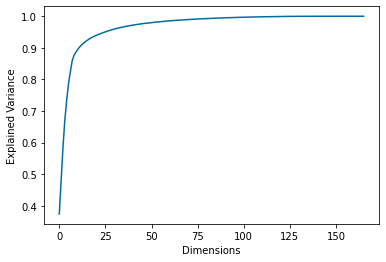

In [131]:
# plot the cumulative variance
cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.savefig('figs/cumulative_variance.png', dpi=425, bbox_inches='tight')
plt.show()

In [ ]:
# find the elbow
pca2 = PCA(n_components = 0.95)
x_reduced = pca2.fit_transform(ss.values)
x_reduced.shape

Here we see that 23 variables account for 95% of the variation in the data. Therefore, when we do feature selection, we will choose `k=23`.

### Feature Extraction

In [132]:
data = ss.copy()

X = data.iloc[:,0:138]  #independent columns
y = data.iloc[:,-1]    #target column 


#apply SelectKBest class to extract top 23 best features
bestfeatures = SelectKBest(k=23) # removed param 'score_func=chi2,' due to negative values in the ds
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(23,'Score'))  #print 23 best features

      Specs         Score
119     P_2  59365.810637
37      B_9  29778.048588
8      B_18  29631.108849
10      B_2  27456.940054
77     D_44  26035.309480
83     D_55  25573.467028
105    D_75  25549.993158
84     D_58  24347.252963
25     B_33  23946.462997
104    D_74  20735.053988
35      B_7  20320.831893
20      B_3  20119.514664
14     B_23  19530.237242
30      B_4  18560.260921
7      B_16  16561.440436
28   B_38_x  16495.920473
29   B_38_y  16495.920473
0       B_1  16050.781462
27     B_37  15656.549636
9      B_19  15408.353111
122     R_1  15263.559144
11     B_20  14793.240020
13     B_22  14432.098017


We can also visualize this:

FileNotFoundError: ignored

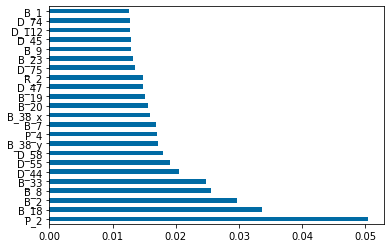

In [133]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.savefig('figs/tree_classifier_visualization_ss.png', dpi=425, bbox_inches='tight')
plt.show()

FileNotFoundError: ignored

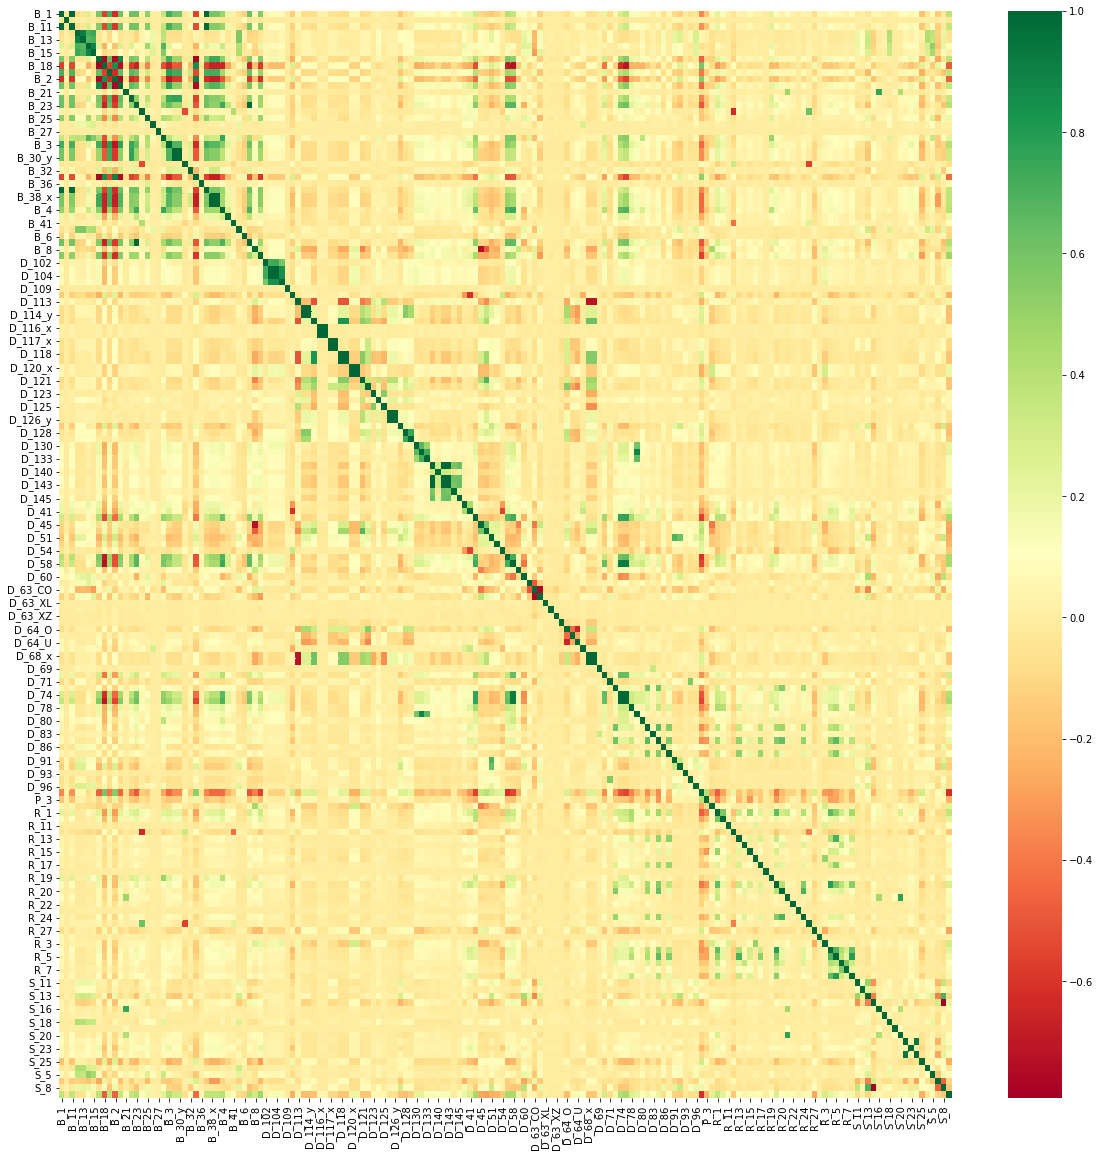

In [134]:
# heat map

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=False,cmap="RdYlGn")
plt.savefig('figs/heat_map2.png', dpi=425, bbox_inches='tight')

In [ ]:
# stepwise selection model

<h2><center>Random Forest Model</center></h2>

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [136]:
# import data using pickle files
eda = pickle.load(open("pickle/eda.pkl", "rb"))
null_hist = pickle.load(open("pickle/nulls.pkl", "rb"))
cat_features = pickle.load(open("pickle/cat_features.pkl", "rb"))
fs = pickle.load(open("pickle/fs_df.pkl", "rb"))
ss = pickle.load(open('data/ss_imputed.pkl', 'rb'))
fs2 = pickle.load(open('data/fs2.pkl', 'rb'))


# pickle.dump(eda, open("pickle/eda.pkl", "wb"))
# pickle.dump(null_hist, open("pickle/nulls.pkl", "wb"))
# pickle.dump(cat_features, open("pickle/cat_features.pkl", "wb"))
# pickle.dump(fs, open("pickle/fs_df.pkl", "wb"))
# pickle.dump(ss, open('data/ss_imputed.pkl', 'wb'))
# pickle.dump(fs2, open('data/fs2.pkl', 'wb'))


FileNotFoundError: ignored

### Train-Test Split

In [137]:
# train test split with stratifier for target

data = ss.copy()
# data.head()


X = data.iloc[:,0:139]  #independent columns
y = data.iloc[:,-1]    #target column 

In [138]:
# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=data['target'])

### Fit the Random Forest Model

In [139]:
# build classifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Metrics

In [140]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9362


In [141]:
print(metrics.confusion_matrix(y_test, y_pred))

[[7170  291]
 [ 347 2192]]


In [142]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7461
           1       0.88      0.86      0.87      2539

    accuracy                           0.94     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.94      0.94      0.94     10000



<h2><center>Hyperparameter for svm</center></h2>

In [ ]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

hyprameter for rf


In [ ]:

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)#whatever this is print fit it again 

In [ ]:


model_random = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=100)#chenge this parms with above 
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))

<h2><center>Next Steps</center></h2>

- Add SVM model
- Categorical variables and DTG variable
* One-hot encoding?
* ??
- Hypertuning
- Adjusting the % nulls accepted
- High-risk goal: random oversampling per the paper
- Run on full DS using pyarrow, other libraries as necessary to reduce data usage
